In [2]:
#Este es el modelo de K-means del Dataset: Mall Customer Segmentation Data:


In [3]:
#para empezar debemos cargar las librerias con las que trabaremos

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [11]:
#subimos nuestro dataset y lo cargamos

In [92]:
datos = pd.read_csv("../Cristin/.ipynb_checkpoints/Mall_Customers.csv")

In [9]:
datos.head(32)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
#Realizamos una descripción de los datos que acabamos de cargar

In [13]:
datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [77]:
datos.shape

(200, 3)

In [ ]:
#Cambiaremos el nombre de las variables para que sea más fácil identificarlas

In [71]:
column_names = {
    'CustomerID': 'ID del Cliente',
    'Age': 'Edad',
    'Annual Income (k$)': 'Ingreso Anual (k$)',
    'Spending Score (1-100)': 'Puntuación de Gasto (1-100)'
}

In [23]:
#Buscaremos los valores falatantes y atípicos en estas variables

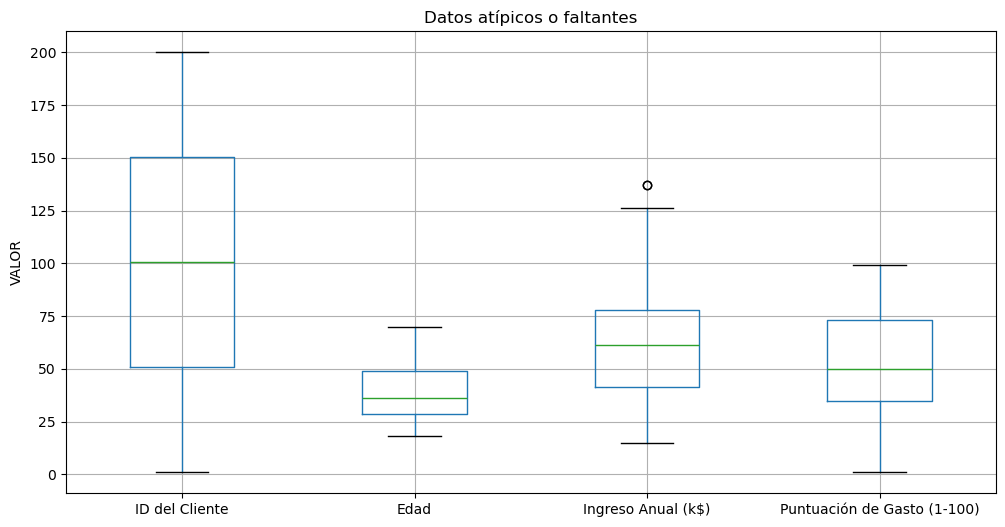

In [83]:
plt.figure(figsize=(12, 6))
datos.boxplot(column=[ 'CustomerID','Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.xticks(range(1, 5), [column_names[col] for col in ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Datos atípicos o faltantes')
plt.ylabel('VALOR')
plt.show()

In [74]:
#vamos a preprocesar los datos limpiándolos, tratando valores falatantes y trasnformádolos según sea necesario

In [40]:
#Vamos a revisar si algún dato esta en cero

In [39]:
print("Cantidad de registros que estan en cero en Edad:",datos['Age'].isin([0]).sum())
print("Cantidad de registros que estan en cero en ID Cliente:",datos['CustomerID'].isin([0]).sum())
print("Cantidad de registros que estan en cero en Ingreso Anual (k$):",datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de registros que estan en cero en Puntuación de Gasto (1-100):",datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de registros que estan en cero en Edad: 0
Cantidad de registros que estan en cero en ID Cliente: 0
Cantidad de registros que estan en cero en Ingreso Anual (k$): 0
Cantidad de registros que estan en cero en Puntuación de Gasto (1-100): 0


In [41]:
#Vamos a identificar los valores atipícos

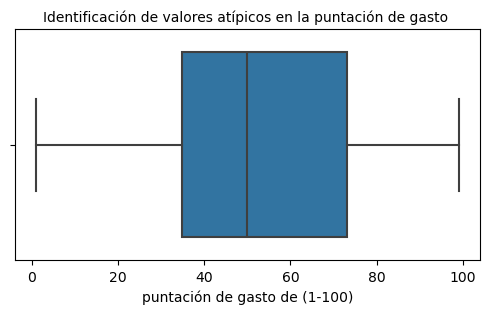

In [100]:
 plt.figure(figsize=(6,3))
sns.boxplot(x='Spending Score (1-100)', data=datos)
plt.xlabel('puntación de gasto de (1-100)')
plt.title('Identificación de valores atípicos en la puntación de gasto ',fontsize=10)
plt.show()

In [51]:
#Vamos a contar los datos atípicos

In [54]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((datos['Spending Score (1-100)']<nivel_minimo)|(datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es de {}".format(Total_Atipicos))

El total de datos atípicos es de 0


In [55]:
#Revisamos los datos nuevamente

In [56]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [84]:
#Seleccionaremos las características más relevantes para entrenar el modelo utilizando la selección de características...

In [94]:
datos=datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]


In [96]:
datos.head(22)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [97]:
#Vamos a realizar una gráfica sin realizar el agrupamiento

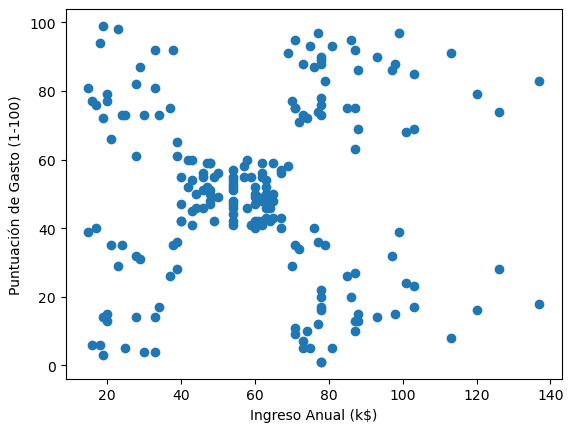

In [98]:
plt.scatter(datos['Annual Income (k$)'],datos['Spending Score (1-100)'])
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.show()

In [101]:
#Ahora empezaremos a configurar el modelo configurando los diferentes hiperparámetros

In [111]:
#Realizamos una gráfica de codo para tener una idea para haber cuantos clusters debemos usar para el modelo

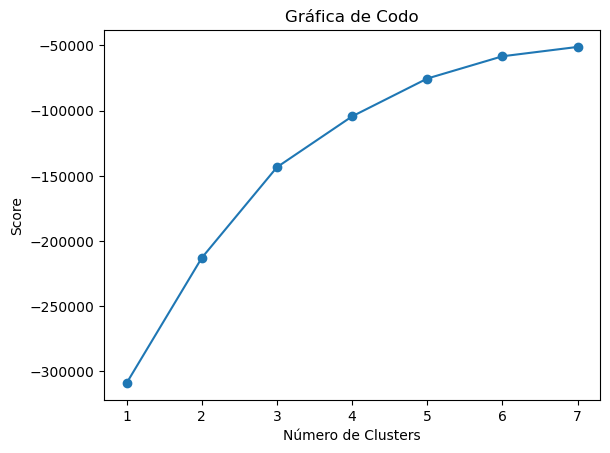

In [108]:
Nc=range(1,8)
kmeans=[KMeans(n_clusters=i)for i in Nc]
kmeans
score=[kmeans[i].fit(datos).score(datos)for i in range(len(kmeans))]
score
plt.plot(Nc,score,marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [110]:
#Realizamos el agrupamiento del modelo con k=6

In [112]:
Modelo=KMeans(n_clusters=6,random_state=0)
Modelo.fit(datos)

KMeans(n_clusters=6, random_state=0)

In [113]:
#Ahora agrupamos la columna en la BD para así idntificar el número del grupo del agrupamiento

In [114]:
Modelo.labels_
datos["Grupo"]=Modelo.labels_
print(datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      5
1     21                  15                      81      4
2     20                  16                       6      5
3     23                  16                      77      4
4     31                  17                      40      5
..   ...                 ...                     ...    ...
195   35                 120                      79      3
196   45                 126                      28      2
197   32                 126                      74      3
198   32                 137                      18      2
199   30                 137                      83      3

[200 rows x 4 columns]


In [115]:
#Vamos a evaluar el desempeño del modelo con métricas como Coeficiente de Silhoutte, índice de Calinski-Harabasz, etc

In [119]:
Numero=len(datos)
X=datos.drop('Grupo',axis=1)
clusters=datos['Grupo']

sil_score= silhouette_score(X,clusters)
calinski_score=calinski_harabasz_score(X,clusters)
davies_score=davies_bouldin_score(X, clusters)

table_data=[
["Número de observaciones",Numero],
["Coeficinete de Silhouette",sil_score],
["Indice de Calinski Harabasz",calinski_score],
["Indice de Davies Bouldin",davies_score]
]
from tabulate import tabulate
print (tabulate (table_data,headers=["Metric","Value"],tablefmt='pretty'))

+-----------------------------+--------------------+
|           Metric            |       Value        |
+-----------------------------+--------------------+
|   Número de observaciones   |        200         |
|  Coeficinete de Silhouette  | 0.4523443947724053 |
| Indice de Calinski Harabasz | 166.7204931788687  |
|  Indice de Davies Bouldin   | 0.7469740072755288 |
+-----------------------------+--------------------+


In [120]:
#Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

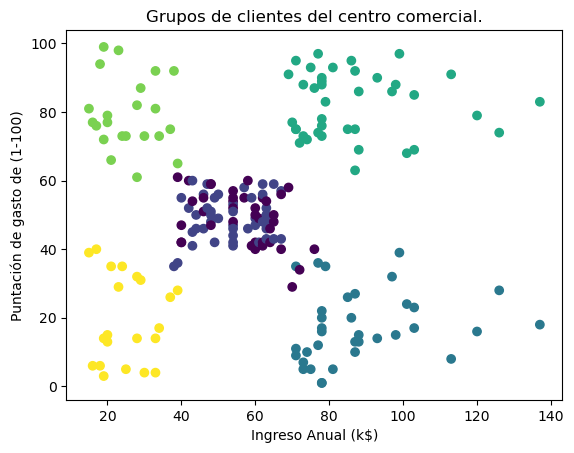

In [125]:
plt.scatter(datos['Annual Income (k$)'],datos['Spending Score (1-100)'],c=datos['Grupo'],cmap='viridis')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntación de gasto de (1-100)')
plt.title('Grupos de clientes del centro comercial.')
plt.show()

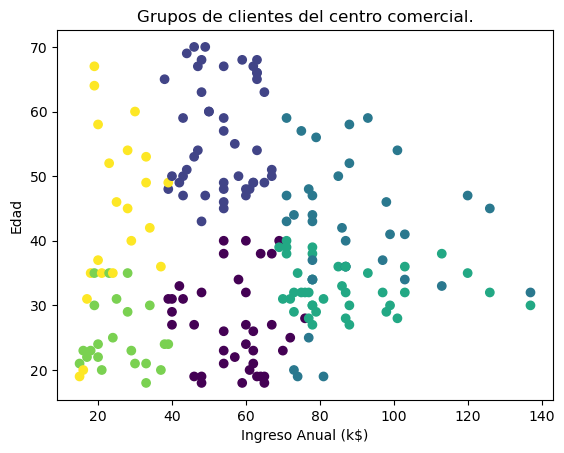

In [130]:
plt.scatter(datos['Annual Income (k$)'],datos['Age'],c=datos['Grupo'],cmap='viridis')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.title('Grupos de clientes del centro comercial.')
plt.show()

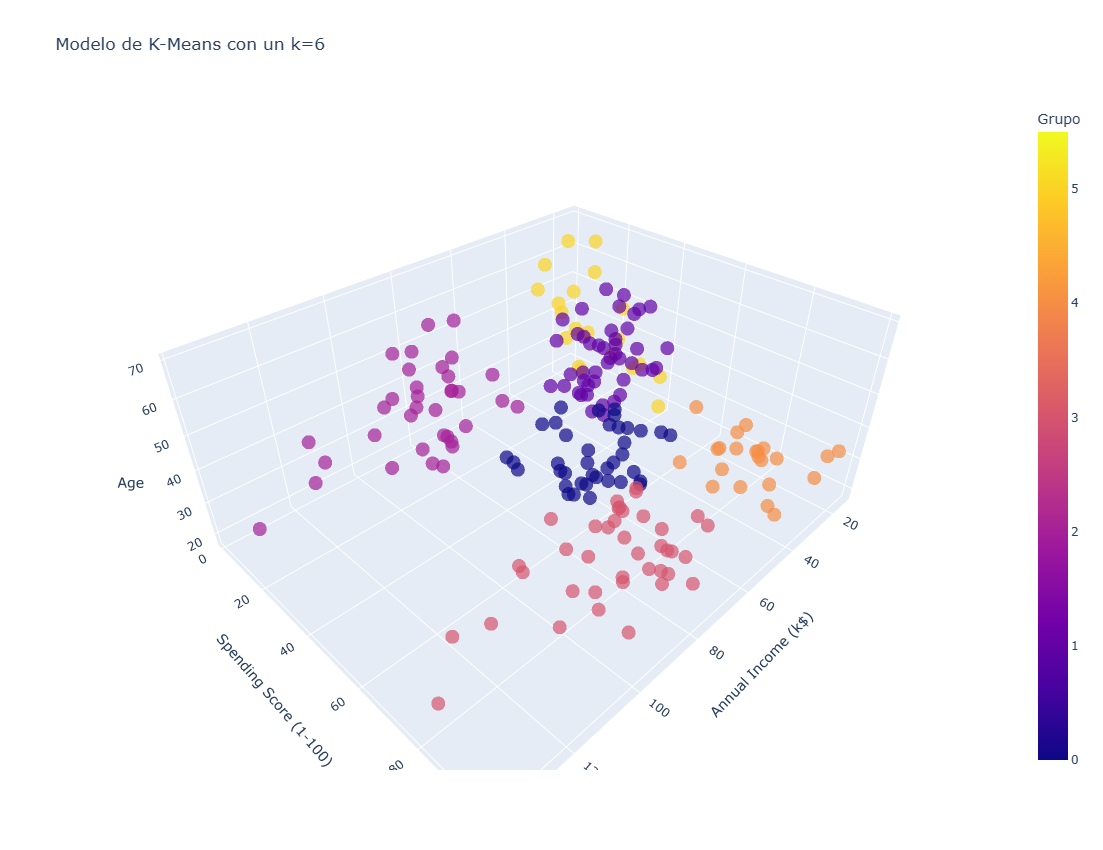

In [140]:
Grafica_3D = px.scatter_3d(datos, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle',6: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={6}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 